<a href="https://colab.research.google.com/github/muhbagasaryad/Machine-Learning/blob/main/3_Model_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [147]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/TA/dataset/Dataset curah hujan dan tinggi air 2.xlsx - Sheet2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
df.head()

,Waktu,Tinggi Muka Air (m),Intensitas Curah Hujan (mm),Kategori Banjir
0,01/01/2015,5.63,33,Siaga1
1,02/01/2015,4.98,NaN,aman
2,03/01/2015,4.69,0,aman
3,04/01/2015,4.94,11.5,aman
4,05/01/2015,4.61,2,aman


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Waktu                        1461 non-null   object 
 1   Tinggi Muka Air (m)          1461 non-null   float64
 2   Intensitas Curah Hujan (mm)  704 non-null    object 
 3   Kategori Banjir              1461 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.8+ KB


In [150]:
df.shape

(1461, 4)

### **Preprocessing Data**

In [151]:
#change object to float64
df['Intensitas Curah Hujan (mm)'] = pd.to_numeric(df['Intensitas Curah Hujan (mm)'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Waktu                        1461 non-null   object 
 1   Tinggi Muka Air (m)          1461 non-null   float64
 2   Intensitas Curah Hujan (mm)  703 non-null    float64
 3   Kategori Banjir              1461 non-null   object 
dtypes: float64(2), object(2)
memory usage: 45.8+ KB


In [152]:
df

,Waktu,Tinggi Muka Air (m),Intensitas Curah Hujan (mm),Kategori Banjir
0,01/01/2015,5.63,33.0,Siaga1
1,02/01/2015,4.98,NaN,aman
2,03/01/2015,4.69,0.0,aman
3,04/01/2015,4.94,11.5,aman
4,05/01/2015,4.61,2.0,aman
...,...,...,...,...
1456,27/12/2018,4.57,16.0,aman
1457,28/12/2018,4.73,3.5,aman
1458,29/12/2018,4.84,NaN,aman
1459,30/12/2018,4.41,NaN,aman


In [153]:
df['Kategori Banjir'].unique()

array(['Siaga1', 'aman', 'Siaga2'], dtype=object)

In [154]:
df.isnull().sum()

Waktu                            0
Tinggi Muka Air (m)              0
Intensitas Curah Hujan (mm)    758
Kategori Banjir                  0
dtype: int64

In [155]:
df.fillna((0), inplace = True)
df.head()

,Waktu,Tinggi Muka Air (m),Intensitas Curah Hujan (mm),Kategori Banjir
0,01/01/2015,5.63,33.0,Siaga1
1,02/01/2015,4.98,0.0,aman
2,03/01/2015,4.69,0.0,aman
3,04/01/2015,4.94,11.5,aman
4,05/01/2015,4.61,2.0,aman


In [156]:
df.isnull().sum()

Waktu                          0
Tinggi Muka Air (m)            0
Intensitas Curah Hujan (mm)    0
Kategori Banjir                0
dtype: int64

In [157]:
banjir_df=df.drop(columns='Kategori Banjir')
banjir_df.head()

,Waktu,Tinggi Muka Air (m),Intensitas Curah Hujan (mm)
0,01/01/2015,5.63,33.0
1,02/01/2015,4.98,0.0
2,03/01/2015,4.69,0.0
3,04/01/2015,4.94,11.5
4,05/01/2015,4.61,2.0


In [158]:
banjir_df.describe()

,Tinggi Muka Air (m),Intensitas Curah Hujan (mm)
count,1461.000000,1461.000000
mean,4.244899,6.221355
std,1.085260,13.125006
min,1.030000,0.000000
25%,3.430000,0.000000
50%,4.180000,0.000000
75%,5.040000,6.000000
max,7.140000,92.000000


In [159]:
banjir_df.corr()

,Tinggi Muka Air (m),Intensitas Curah Hujan (mm)
Tinggi Muka Air (m),1.000000,0.407634
Intensitas Curah Hujan (mm),0.407634,1.000000


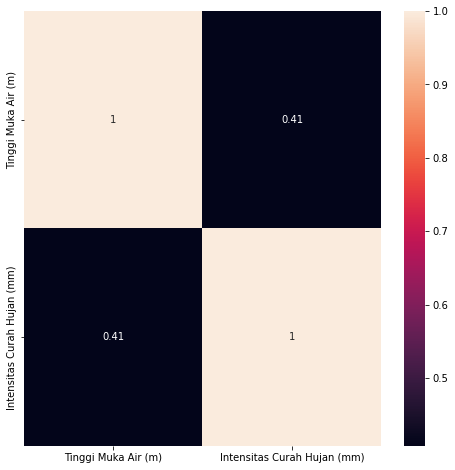

In [160]:
plt.figure(figsize=(8, 8))
sns.heatmap(banjir_df.corr(),annot=True)

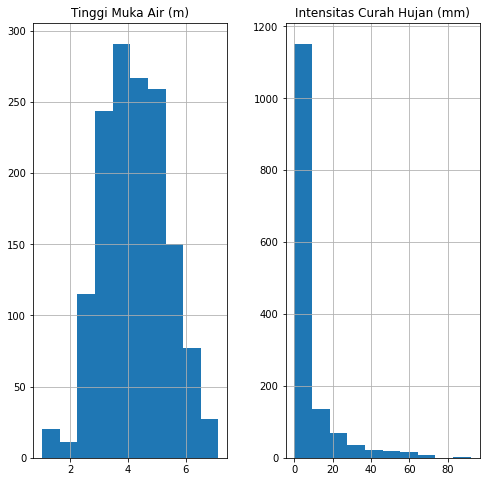

In [161]:
banjir_df.hist(figsize=(8,8))
plt.show()

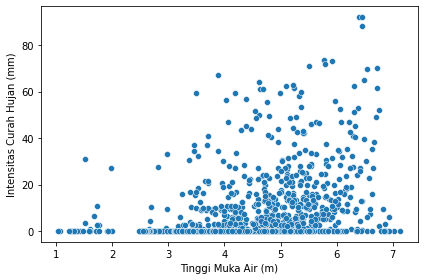

In [162]:
sns.scatterplot(x='Tinggi Muka Air (m)', y='Intensitas Curah Hujan (mm)', data=banjir_df)
plt.tight_layout()

In [163]:
df['Kategori Banjir'].replace(['aman','Siaga1','Siaga2'],[0,1,2],inplace=True)
df.head()

,Waktu,Tinggi Muka Air (m),Intensitas Curah Hujan (mm),Kategori Banjir
0,01/01/2015,5.63,33.0,1
1,02/01/2015,4.98,0.0,0
2,03/01/2015,4.69,0.0,0
3,04/01/2015,4.94,11.5,0
4,05/01/2015,4.61,2.0,0


In [164]:
df['Kategori Banjir'].value_counts()

0    1080
1     294
2      87
Name: Kategori Banjir, dtype: int64

In [165]:
#memisahkan data untuk prediksi
x = df.iloc[:,1:3]
x.head()

,Tinggi Muka Air (m),Intensitas Curah Hujan (mm)
0,5.63,33.0
1,4.98,0.0
2,4.69,0.0
3,4.94,11.5
4,4.61,2.0


In [166]:
#memisahkan kolom kategori dari dataset
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Kategori Banjir, dtype: int64

### **Decision Tree**

In [167]:
import time

start = time.time()
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,plot_confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
print("Training dataset: ", x_train.shape[0])
print("Test dataset: ", x_test.shape[0])

Training dataset:  876
Test dataset:  585


In [168]:
#data train
x_train.head()

,Tinggi Muka Air (m),Intensitas Curah Hujan (mm)
1098,5.24,13.5
1147,5.41,3.5
503,6.24,14.5
601,3.39,0.0
1064,5.03,1.5


In [169]:
y_train.head()

1098    1
1147    1
503     2
601     0
1064    1
Name: Kategori Banjir, dtype: int64

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_clf.fit(x_train,y_train)
dt_clf_acc = cross_val_score(dt_clf,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dt_clf_acc

array([0.98972603, 0.99315068, 1.        ])

In [171]:
#Training Data
y_pred = dt_clf.predict(x_train)
print("\naccuracy score:%f"%(accuracy_score(y_train,y_pred)*100))


accuracy score:99.771689


Confusion Matrix: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       635
           1       0.99      0.99      0.99       187
           2       1.00      1.00      1.00        54

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


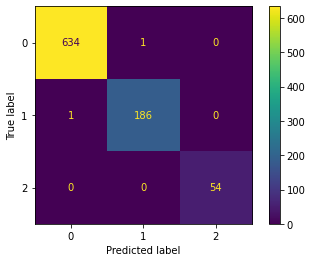

In [172]:
print('Confusion Matrix: \n')
print(plot_confusion_matrix(dt_clf, x_train, y_train))
print(metrics.classification_report(y_train, y_pred))

In [173]:
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1.8723459243774414s


In [174]:
#Predicted flood chances
start1 = time.time()

y_pred = dt_clf.predict(x_test)
#print(y_pred)

In [175]:
#Actual flood chances
#print("actual values:")
#print(y_test.values)

In [176]:
#Test Data
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


accuracy score:98.632479


Confusion Matrix: 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       445
           1       0.95      0.98      0.96       107
           2       0.97      1.00      0.99        33

    accuracy                           0.99       585
   macro avg       0.97      0.99      0.98       585
weighted avg       0.99      0.99      0.99       585



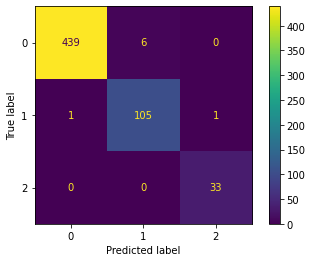

In [177]:
#cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n')
print(plot_confusion_matrix(dt_clf, x_test, y_test))
print(metrics.classification_report(y_test, y_pred))

In [178]:
stop1 = time.time()
print(f"Testing time: {stop1 - start1}s")

Testing time: 0.4881877899169922s


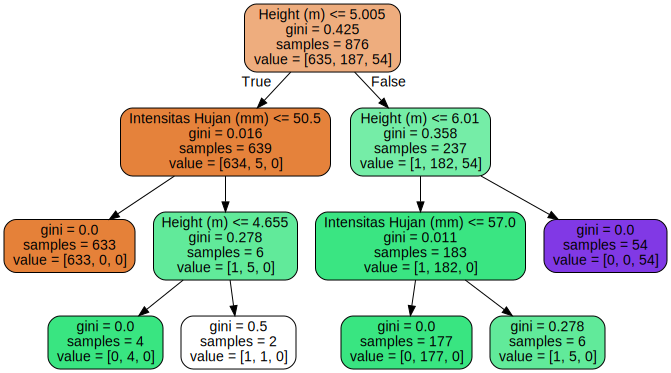

In [179]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
feature_names = ['Height (m)','Intensitas Hujan (mm)']
dot_data = tree.export_graphviz(dt_clf, out_file=None, filled=True, rounded = True, feature_names=feature_names)
graph = graphviz.Source(dot_data)
graph

In [180]:
x_new=[[5,40]]
pred = dt_clf.predict(x_new)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [181]:
import pickle
pickle.dump(dt_clf, open('modeldt.pkl', 'wb'))
model = pickle.load(open('modeldt.pkl', 'rb'))
print(model)

DecisionTreeClassifier(max_depth=3, random_state=0)


### **Random Forest**

In [182]:
import time

start2 = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,plot_confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
rf = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
rf_clf = rf.fit(x_train,y_train)
rf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [183]:
print("Training dataset: ", x_train.shape[0])
print("Test dataset: ", x_test.shape[0])

Training dataset:  876
Test dataset:  585


In [184]:
from sklearn.model_selection import cross_val_score
rf_clf_acc = cross_val_score(rf_clf,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rf_clf_acc

array([0.99315068, 0.99315068, 0.98972603])

In [185]:
y_pred = rf_clf.predict(x_train)

In [186]:
#Training data
print("\naccuracy score:%f"%(accuracy_score(y_train,y_pred)*100))


accuracy score:99.657534


Confusion Matrix: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       0.99      0.99      0.99       172
           2       1.00      1.00      1.00        57

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


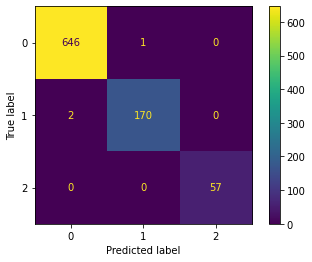

In [187]:
print('Confusion Matrix: \n')
print(plot_confusion_matrix(rf_clf, x_train, y_train))
print(metrics.classification_report(y_train, y_pred))

In [188]:
stop2 = time.time()
print(f"Training time: {stop2 - start2}s")

Training time: 0.9555788040161133s


In [189]:
start3 = time.time()

y_pred = rf_clf.predict(x_test)

In [190]:
#Testing data
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


accuracy score:98.974359


Confusion Matrix: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       433
           1       0.98      0.98      0.98       122
           2       0.97      1.00      0.98        30

    accuracy                           0.99       585
   macro avg       0.98      0.99      0.98       585
weighted avg       0.99      0.99      0.99       585



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


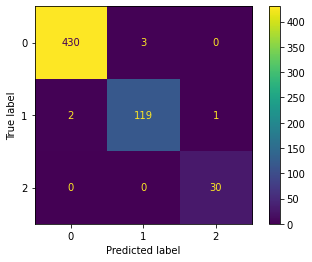

In [191]:
#cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n')
print(plot_confusion_matrix(rf_clf, x_test, y_test))
print(metrics.classification_report(y_test, y_pred))

In [192]:
stop3 = time.time()
print(f"Testing time: {stop3 - start3}s")

Testing time: 0.3432033061981201s


In [193]:
x_new=[[4,70]]
pred = rf_clf.predict(x_new)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [194]:
import pickle
pickle.dump(rf_clf, open('modelrf.pkl', 'wb'))
model = pickle.load(open('modelrf.pkl', 'rb'))
print(model)

RandomForestClassifier(max_depth=3, random_state=0)


### **Naive Bayes**

In [195]:
import time

start4 = time.time()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix, plot_confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state = 0)
print("Training dataset: ", x_train.shape[0])
print("Test dataset: ", x_test.shape[0])

Training dataset:  876
Test dataset:  585


In [196]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(x_train)
testing_data = count_vector.transform(x_test)
naive_bayes = GaussianNB()

In [197]:
naive_bayes.fit(x_train,y_train)
y_pred = naive_bayes.predict(x_train)

In [198]:
#Training data
print("\naccuracy score:%f"%(accuracy_score(y_train,y_pred)*100))


accuracy score:93.607306


Confusion Matrix: 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       635
           1       0.88      0.81      0.84       187
           2       0.94      0.91      0.92        54

    accuracy                           0.94       876
   macro avg       0.92      0.90      0.91       876
weighted avg       0.93      0.94      0.94       876



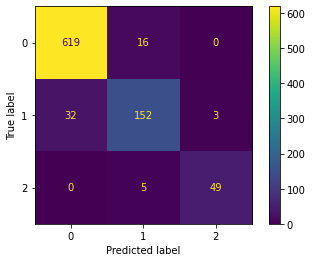

In [199]:
print('Confusion Matrix: \n')
print(plot_confusion_matrix(naive_bayes, x_train, y_train))
print(metrics.classification_report(y_train, y_pred))

In [200]:
stop4 = time.time()
print(f"Training time: {stop4 - start4}s")

Training time: 0.40056729316711426s


In [201]:
start5 = time.time()

naive_bayes.fit(x_train,y_train)
y_pred = naive_bayes.predict(x_test)

In [202]:
#Testing data
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


accuracy score:93.846154


Confusion Matrix: 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       445
           1       0.83      0.84      0.83       107
           2       0.97      0.94      0.95        33

    accuracy                           0.94       585
   macro avg       0.92      0.91      0.92       585
weighted avg       0.94      0.94      0.94       585



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


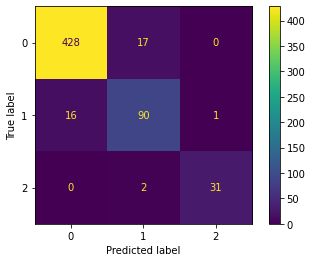

In [203]:
#cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n')
print(plot_confusion_matrix(naive_bayes, x_test, y_test))
print(metrics.classification_report(y_test, y_pred))

In [204]:
stop5 = time.time()
print(f"Testing time: {stop5 - start5}s")

Testing time: 0.5495498180389404s


In [205]:
x_new=[[7,40]]
pred = naive_bayes.predict(x_new)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([2])

In [206]:
import pickle
pickle.dump(naive_bayes, open('modelgnb.pkl', 'wb'))
model = pickle.load(open('modelgnb.pkl', 'rb'))
print(model)

GaussianNB()


### **Visualisasi Data**

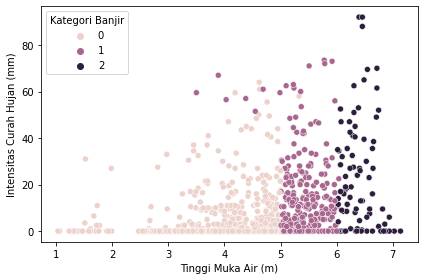

In [207]:
sns.scatterplot(x='Tinggi Muka Air (m)', y='Intensitas Curah Hujan (mm)', data=df, hue='Kategori Banjir')
plt.tight_layout()

### **Comparing 3 Model ML**

In [208]:
models = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred)*100)
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name      Score
0   DT  98.803419
1   RF  98.803419
2   NB  93.846154


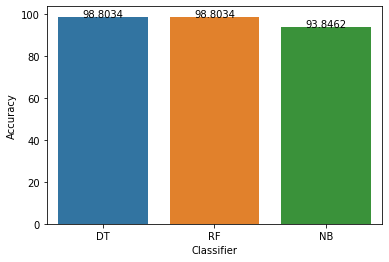

In [209]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()